In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# **NO 1**

# Uji Regresi Serentak dan Parsial

In [ ]:
data=pd.read_csv("SOAL KODE 01(Sheet1).csv",sep=";")
data

,usia,jenis kelamin,imt,anak,merokok,wilayah,biaya
0,19,wanita,"27,9",0,ya,wilayah 1,"16884,92400"
1,18,pria,"33,77",1,tidak,wilayah 2,"1725,55230"
2,28,pria,33,3,tidak,wilayah 2,"4449,46200"
3,33,pria,"22,705",0,tidak,wilayah 3,"21984,47061"
4,32,pria,"28,88",0,tidak,wilayah 3,"3866,85520"
...,...,...,...,...,...,...,...
1333,50,pria,"30,97",3,tidak,wilayah 3,"10600,54830"
1334,18,wanita,"31,92",0,tidak,wilayah 4,"2205,98080"
1335,18,wanita,"36,85",0,tidak,wilayah 2,"1629,83350"
1336,21,wanita,"25,8",0,tidak,wilayah 1,"2007,94500"


In [ ]:
data['imt'] = data['imt'].str.replace(',', '.').astype(float)
data['biaya'] = data['biaya'].str.replace(',', '.').astype(float)

In [ ]:
data = pd.get_dummies(data, columns=['jenis kelamin', 'merokok', 'wilayah'])

In [ ]:
data.replace({True: 1, False: 0}, inplace=True)

In [ ]:
data.head()

,usia,imt,anak,biaya,jenis kelamin_pria,jenis kelamin_wanita,merokok_tidak,merokok_ya,wilayah_wilayah 1,wilayah_wilayah 2,wilayah_wilayah 3,wilayah_wilayah 4
0,19,27.900,0,16884.92400,0,1,0,1,1,0,0,0
1,18,33.770,1,1725.55230,1,0,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,1,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,1,0


In [ ]:
print(data.dtypes)

usia                      int64
imt                     float64
anak                      int64
biaya                   float64
jenis kelamin_pria        int64
jenis kelamin_wanita      int64
merokok_tidak             int64
merokok_ya                int64
wilayah_wilayah 1         int64
wilayah_wilayah 2         int64
wilayah_wilayah 3         int64
wilayah_wilayah 4         int64
dtype: object


In [ ]:
x=data.drop("biaya",axis=1)
y=data["biaya"]


In [ ]:
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  biaya   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        17:28:38   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -296.4168 

# Uji Asumsi

In [ ]:
# Uji Linearitas

for col in X.columns[1:]:
    sns.lmplot(x=col, y='biaya', data=data)
    plt.title(f'Scatter plot of {col} vs biaya with regression line')
    plt.show()

In [ ]:
#Autokorelasi (ini gausah dihafalin, ada di output ols)

dw_value = durbin_watson(model.resid)
print(f'Nilai Durbin-Watson: {dw_value:.4f}')

plot_acf(model.resid)
plt.title('Autocorrelation of Residuals')
plt.show()


hasil uji white (143.22388748770754, 9.962104422822081e-15, 4.332152360553438, 9.948265335582862e-16)


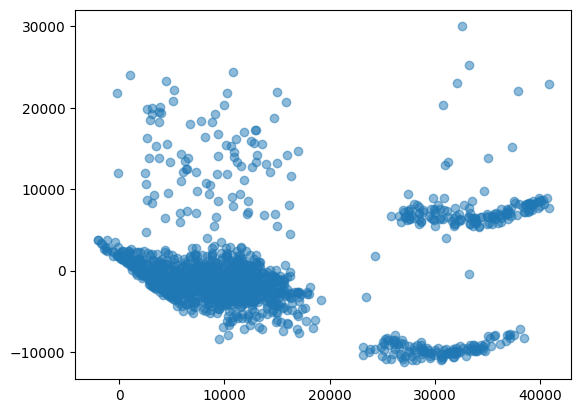

In [ ]:
# Uji Heterokesdasitas

# bisa make uji white (regresi antara absolut residual dengan var x)
# atau memakai plot antara fitted values dengan residuals

from statsmodels.stats.diagnostic import het_white
uji_white = het_white(result.resid, X)
print("hasil uji white",uji_white)

residuals = result.resid
fitted_values = result.fittedvalues
plt.scatter(fitted_values, residuals, alpha=0.5)


In [ ]:
# Uji Distribusi Error Normal
alpha=0.05
from scipy.stats import shapiro
stat, p_value = shapiro(result.resid)

print(f'Statistik Shapiro-Wilk: {stat}')
print(f'p-value: {p_value}')

if p_value>alpha:
  print ("Berdistribusi Normal")
else:
  print ("Tidak berdstribusi normal")

Statistik Shapiro-Wilk: 0.8989452123641968
p-value: 8.386100229116538e-29
Tidak berdstribusi normal


In [ ]:
# Uji Multikolinearitas

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                feature        VIF
0                 const  38.849263
1                  usia   1.016822
2                   imt   1.106630
3                  anak   1.004011
4  jenis kelamin_wanita   1.008900
5            merokok_ya   1.012074
6     wilayah_wilayah 2   1.597103
7     wilayah_wilayah 3   1.524748
8     wilayah_wilayah 4   1.526210


# Regresi Polinom

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

derajat_polinomial = 2
polynomial_features = PolynomialFeatures(degree=derajat_polinomial)
X_polynomial = polynomial_features.fit_transform(X)

result = LinearRegression()


result.fit(X_polynomial, y)


y_pred = result.predict(X_polynomial)


print("Koefisien regresi:", result.coef_)
print("Intercept:", result.intercept_)

r_squared = result.score(X_polynomial, y)
print("R-squared:", r_squared)


Koefisien regresi: [-3.85877116e+00 -1.72121931e-01 -3.94327584e+07  7.29287146e+08
  3.43813984e+09 -4.17320969e+09 -1.37339657e+08 -9.56578241e-02
 -3.94327586e+07  7.29287146e+08  3.43813984e+09 -4.17320969e+09
 -1.37339656e+08  1.83064254e+04 -7.22794837e+05 -3.39871500e+06
  4.12751938e+06  1.35579333e+05  3.05792731e+05 -6.95992455e+05
 -4.35690778e+05  5.30907059e+05  2.61425701e+05  3.63179622e+05
 -2.06689192e+05  9.30452506e+04 -1.10065165e+05 -1.05803021e+05]
Intercept: 84644765734.69815
R-squared: 0.5385341308358803


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi logistik
model = LogisticRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Mencetak laporan klasifikasi dan matriks kebingungan
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("Matriks Kebingungan:\n", confusion_matrix(y_test, y_pred))


In [ ]:
hasil = result.params[0] + result.params[1]*40 + result.params[2]*20 + result.params[3]*3 + result.params[8]*1 + result.params[6]*1
print(f'prediksi biaya pengobatan kakek adalah {hasil}')

prediksi biaya pengobatan kakek adalah 5668.586444198765


# **NO 2**

# Uji Serentak dan parsial

In [ ]:
import pandas as pd
data2=pd.read_csv("soal2.csv",sep=";")
data2

,Kamar,Jarak,Daerah,Metode,Tahun,Harga
0,3,3,Utara,S,2018,1490
1,3,3,Utara,S,2009,1220
2,3,3,Utara,S,2010,1420
3,2,"10,4",Barat,S,2011,670
4,2,"10,4",Barat,S,2008,530
...,...,...,...,...,...,...
35309,3,"23,2",Timur,SP,1995,736
35310,3,"8,4",Utara,S,1995,808
35311,3,"20,6",Utara,S,2005,566
35312,3,"20,6",Utara,S,2018,500


In [ ]:
data2 = pd.get_dummies(data2, columns=['Daerah','Metode'],drop_first=True)


In [ ]:
data2.replace({True:1,False:0},inplace=True)
data2.head()


,Kamar,Jarak,Tahun,Harga,Daerah_Selatan,Daerah_Timur,Daerah_Utara,Metode_SA,Metode_SP,Metode_VB
0,3,3,2018,1490,0,0,1,0,0,0
1,3,3,2009,1220,0,0,1,0,0,0
2,3,3,2010,1420,0,0,1,0,0,0
3,2,"10,4",2011,670,0,0,0,0,0,0
4,2,"10,4",2008,530,0,0,0,0,0,0


In [ ]:
print(data2.dtypes)

Kamar               int64
Jarak             float64
Tahun               int64
Harga              object
Daerah_Selatan      int64
Daerah_Timur        int64
Daerah_Utara        int64
Metode_SA           int64
Metode_SP           int64
Metode_VB           int64
dtype: object


In [ ]:
data2['Harga'] = data2['Harga'].str.replace(',', '.').astype(float)

In [ ]:
x=data2.drop("Harga",axis=1)
y=data2["Harga"]

In [ ]:
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Harga   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     3706.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:39:35   Log-Likelihood:            -2.6419e+05
No. Observations:               35314   AIC:                         5.284e+05
Df Residuals:                   35304   BIC:                         5.285e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -540.7516    528.656     -1.

# **NO 3**

# Uji serentak dan parsial

In [ ]:
data3=pd.read_csv("playstore.csv",sep=",")
data3

,Rating,Kategori_aplikasi,Jumlah_review,Ukuran_aplikasi (Mb),Harga_aplikasi ($),Genre_aplikasi
0,4.5,GAME,4447388,67.0,0.0,Adult
1,4.5,GAME,27722264,76.0,0.0,Adult
2,4.4,GAME,22426677,74.0,0.0,Everyone
3,4.7,GAME,254258,23.0,0.0,Everyone
4,4.5,GAME,148897,46.0,0.0,Everyone
...,...,...,...,...,...,...
3219,5.0,FAMILY,22,8.6,0.0,Teen
3220,4.2,FAMILY,117,13.0,0.0,Everyone
3221,4.0,FAMILY,7,2.6,0.0,Everyone
3222,4.5,FAMILY,38,53.0,0.0,Everyone


In [ ]:
data3.columns

Index(['Rating', 'Jumlah_review', 'Ukuran_aplikasi (Mb)', 'Harga_aplikasi ($)',
       'Kategori_aplikasi_GAME', 'Kategori_aplikasi_TOOLS',
       'Genre_aplikasi_Everyone', 'Genre_aplikasi_Mature',
       'Genre_aplikasi_Teen'],
      dtype='object')

In [ ]:
data3=pd.get_dummies(data3,columns=["Kategori_aplikasi_TOOLS","Genre_aplikasi_Mature"],drop_first=True)
data3.replace({True:1,False:0},inplace=True)
data3.head()


,Rating,Jumlah_review,Ukuran_aplikasi (Mb),Harga_aplikasi ($),Kategori_aplikasi_GAME,Genre_aplikasi_Everyone,Genre_aplikasi_Teen,Kategori_aplikasi_TOOLS_True,Genre_aplikasi_Mature_True
0,4.5,4447388,67.0,0.0,1,0,0,0,0
1,4.5,27722264,76.0,0.0,1,0,0,0,0
2,4.4,22426677,74.0,0.0,1,1,0,0,0
3,4.7,254258,23.0,0.0,1,1,0,0,0
4,4.5,148897,46.0,0.0,1,1,0,0,0


In [ ]:
print(data3.dtypes)

Rating                          float64
Jumlah_review                     int64
Ukuran_aplikasi (Mb)            float64
Harga_aplikasi ($)              float64
Kategori_aplikasi_GAME            int64
Genre_aplikasi_Everyone           int64
Genre_aplikasi_Teen               int64
Kategori_aplikasi_TOOLS_True      int64
Genre_aplikasi_Mature_True        int64
dtype: object


In [ ]:
x=data3.drop("Rating",axis=1)
y=data3["Rating"]

In [ ]:
X=sm.add_constant(x)
reg=sm.OLS(y,X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     17.44
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.13e-25
Time:                        15:39:45   Log-Likelihood:                -2354.9
No. Observations:                3224   AIC:                             4728.
Df Residuals:                    3215   BIC:                             4783.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# **NO 4**

# Uji serentak dan parsial

In [ ]:
data4=pd.read_csv("Microsoft.csv")
data4

,Year,Open,High,Low,Close,Volume
0,2012,30.62,31.10,30.59,30.95,38414184
1,2012,30.85,31.10,30.64,30.96,49758864
2,2012,30.88,31.08,30.52,30.77,58182332
3,2012,30.63,30.70,30.19,30.45,50564284
4,2012,30.28,30.88,30.24,30.66,51201288
...,...,...,...,...,...,...
3125,2021,275.20,277.69,270.04,272.42,25076046
3126,2021,264.45,274.65,261.60,274.58,43797176
3127,2021,270.31,273.45,268.41,270.02,28058958
3128,2021,272.09,274.16,267.26,268.75,20210064


In [ ]:
print(data4.dtypes)

Year        int64
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [ ]:
x=data4.drop("Volume",axis=1)
y=data4["Volume"]

In [ ]:
X=sm.add_constant(x)
models=sm.OLS(y,X).fit()
print(models.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     347.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.19e-297
Time:                        15:40:50   Log-Likelihood:                -56629.
No. Observations:                3130   AIC:                         1.133e+05
Df Residuals:                    3124   BIC:                         1.133e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.108e+09   3.16e+08     25.682      0.0